<a href="https://colab.research.google.com/github/ValentineAlibert/Data-physics/blob/master/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4**

In [0]:
#direcotry and download the root form cern
!mkdir -p APPS
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2020-03-03 08:26:42--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’

root_v6.13.08.Linux 100%[===================>] 131.05M  18.9MB/s    in 8.1s    

2020-03-03 08:26:50 (16.2 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.3’ saved [137415272/137415272]



In [0]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

#ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 555d05326f00 at 7f45d173d890>

Welcome to JupyROOT 6.13/08


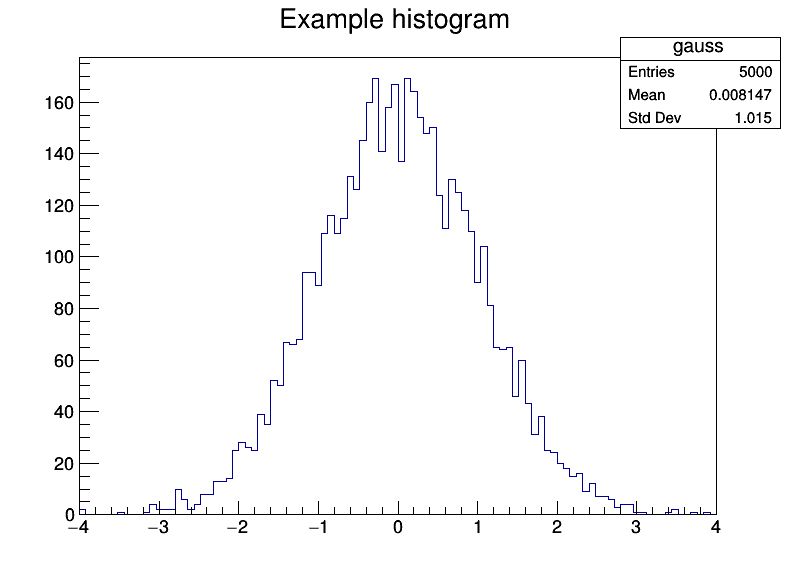

In [0]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

In [0]:
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-03 08:32:57--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.93.89, 188.184.28.138, 188.185.82.144, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.93.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  11.0MB/s    in 39s     

2020-03-03 08:33:37 (10.9 MB/s) - ‘B2HHH_MagnetUp.root’ saved [444723234/444723234]




RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


cling::DynamicLibraryManager::loadLibrary(): libGraf3d.so: cannot open shared object file: No such file or directory
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libTreePlayer.so for TTreeFormula
cling::DynamicLibraryManager::loadLibrary(): libGraf3d.so: cannot open shared object file: No such file or directory
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libTreePlayer.so for TTreeFormula


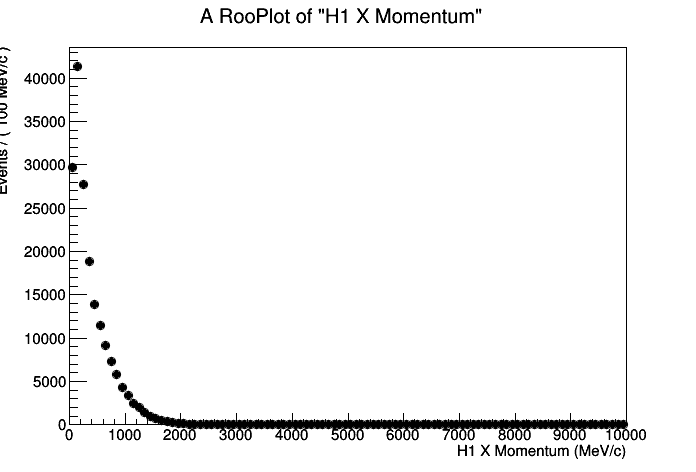

In [0]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

In [0]:
#For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement
#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:
#Hint: I suggest we define a function which we might want to use later - something like:

def p_tot_daughter(daughter):
  p_tot="sqrt(("+daughter+"_PX)**2+("+daughter+"_PY)**2+("+daughter+"_PZ)**2)"
  return p_tot

d="H3"
total_momentum = ROOT.RooRealVar("p_tot_daughter(d)", "total momentum", 0, 10000, "MeV/c")

print(total_momentum)


<ROOT.RooRealVar object ("p_tot_daughter(d)") at 0x555d0e011200>


In [0]:
#Now plot the total momentum for one (or more) of the daughter particles.
#use the histogram plotting tools, call your function to find the total momentum and then plot it!



In [0]:
#The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) 
#and your relativity knowledge to get an equation for the energy of the Kaon.

#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily